## Introduction to Pandas - Pyladies Berlin

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from csv import reader

### Campaign Finance

Today we will take a quick look at the 2016 election in the states and compare some campaign finance data on it. We'll use this as a way to get started with [Pandas](http://pandas.pydata.org/), a powerful data analysis library in Python.

The data files we will use are in the [data folder in this repository](https://github.com/kjam/random_hackery) or available for download on the [FEC site](http://www.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016). 

To begin, we need to extract the headers for the file, as they are not included in the data dumps.

In [8]:
cand_header = [r for r in reader(open('data/cn_header_file.csv', 'r'))]

In [5]:
cand_header

[['CAND_ID',
  'CAND_NAME',
  'CAND_PTY_AFFILIATION',
  'CAND_ELECTION_YR',
  'CAND_OFFICE_ST',
  'CAND_OFFICE',
  'CAND_OFFICE_DISTRICT',
  'CAND_ICI',
  'CAND_STATUS',
  'CAND_PCC',
  'CAND_ST1',
  'CAND_ST2',
  'CAND_CITY',
  'CAND_ST',
  'CAND_ZIP']]

We can then pass this first list item along with the data to the [read_csv method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). We are using the sep keyword argument to define how our file is separated between fields.

This will create a [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [11]:
candidates = pd.read_csv('data/cn.txt', names=cand_header[0], sep='|')

In [12]:
candidates.head()

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,C,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


To take a look at columns, we can use the dataframe like a dictionary and pass the column name as the key. In return we get what is called a [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

In [14]:
candidates['CAND_NAME']

0                       COX, JOHN R.
1                       ROBY, MARTHA
2                  JOHN, ROBERT E JR
3          CRAMER, ROBERT E "BUD" JR
4                         BROOKS, MO
5                COOKE, STANLEY KYLE
6           SEWELL, TERRYCINA ANDREA
7        HILLIARD, EARL FREDERICK JR
8                   CHAMBERLAIN, DON
9           CRAWFORD, ERIC ALAN RICK
10        GREGORY, JAMES CHRISTOPHER
11                      CAUSEY, CHAD
12                SMITH, PRINCELLA D
13             GRIFFIN, JOHN TIMOTHY
14                ELLIOTT, JOYCE ANN
15      SKOCH, BERNARD KURT 'BERNIE'
16           WHITAKER, DAVID JEFFREY
17                     WOMACK, STEVE
18                 FALEOMAVAEGA, ENI
19                   FLAKE, JEFF MR.
20               GOSAR, PAUL ANTHONY
21                      MEHTA, STEVE
22                  TOBIN, ANDY HON.
23            GRESSLEY, FORREST DAYL
24                    PARKER, VERNON
25                       QUAYLE, BEN
26                 SCOTT, BRIAN ALAN
2

We can also use slicing and selecting to review either a Series or a DataFrame. There are a few different methods available. 

We can use a boolean selector which returns a truth Series or DataFrame.

In [15]:
candidates['CAND_ELECTION_YR'] == 2016

0       False
1        True
2        True
3       False
4        True
5       False
6        True
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6920    False
6921    False
6922    False
6923    False
6924    False
6925    False
6926    False
6927    False
6928    False
6929    False
6930    False
6931    False
6932    False
6933     True
6934    False
6935    False
6936    False
6937    False
6938    False
6939    False
6940    False
6941    False
6942    False
6943    False
6944    False
6945    False
6946    False
6947    False
6948     True
6949    False
Name: CAND_ELECTION_YR, dtype: bool

In [16]:
candidates[candidates['CAND_ELECTION_YR'] == 2016]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0
6,H0AL07086,"SEWELL, TERRYCINA ANDREA",DEM,2016,AL,H,7.0,I,C,C00458976,PO BOX 1964,NaN,BIRMINGHAM,AL,35201.0
9,H0AR01083,"CRAWFORD, ERIC ALAN RICK",REP,2016,AR,H,1.0,I,C,C00462374,34 CR 455,NaN,JONESBORO,AR,72404.0
17,H0AR03055,"WOMACK, STEVE",REP,2016,AR,H,3.0,I,C,C00477745,134 N PLEASANT RIDGE DRIVE,NaN,ROGERS,AR,727560701.0
20,H0AZ01259,"GOSAR, PAUL ANTHONY",REP,2016,AZ,H,4.0,I,C,C00461806,PO BOX 2967,NaN,PRESCOTT,AZ,86302.0
39,H0CA03078,"BERA, AMERISH",DEM,2016,CA,H,7.0,I,C,C00461061,PO BOX 582496,NaN,ELK GROVE,CA,95758.0
44,H0CA10073,"DESAULNIER, MARK",DEM,2016,CA,H,11.0,I,C,C00554709,POST OFFICE BOX 6066,NaN,CONCORD,CA,94524.0
47,H0CA10149,"GARAMENDI, JOHN",DEM,2016,CA,H,3.0,I,C,C00462697,1050 17TH ST NW STE 590,NaN,WASHINGTON,DC,20036.0


We can also simply select with indexing or slices.

Both [loc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) and [iloc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) methods can be very useful for selecting rows.

In [18]:
candidates[candidates['CAND_ELECTION_YR'] == 2016][['CAND_ID', 'CAND_NAME']].head()

,CAND_ID,CAND_NAME
1,H0AL02087,"ROBY, MARTHA"
2,H0AL02095,"JOHN, ROBERT E JR"
4,H0AL05163,"BROOKS, MO"
6,H0AL07086,"SEWELL, TERRYCINA ANDREA"
9,H0AR01083,"CRAWFORD, ERIC ALAN RICK"


In [19]:
candidates.shape

(6950, 15)

In [20]:
candidates.loc[6940:]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
6940,S8TX00269,"STRIPLING, RANDOLPH B RANDY",IND,2008,TX,S,0.0,C,N,C00446609,9704 BEAUCHAMP SQUARE,NaN,AUSTIN,TX,78729.0
6941,S8VA00222,"WRIGHT, ISHAH",OTH,2008,VA,S,0.0,O,N,C00435131,632 THOMAS ROAD,NaN,LYNCHBURG,VA,24502.0
6942,S8VA00230,"MODICA, JULIEN",DEM,2012,VA,S,0.0,O,P,C00494187,11951 FREEDOM DRIVE FLOOR 13,NaN,RESTON,VA,20190.0
6943,S8VA00255,"GILMORE, JAMES S (JIM) III",REP,2008,VA,S,0.0,O,P,C00441261,631 S WASHINGTON STREET,NaN,ALEXANDRIA,VA,22314.0
6944,S8VA00263,"MARSHALL, ROBERT G",REP,2012,VA,S,0.0,O,P,C00511956,PO BOX 422,NaN,MANASSAS,VA,20108.0
6945,S8VT00059,"MCMULLEN, JOHN A",REP,2004,VT,S,0.0,C,P,C00334029,130 SOUTH WILLARD STREET,NaN,BURLINGTON,VT,5401.0
6946,S8WA00186,"SENN, DEBORAH",DEM,2000,WA,S,0.0,C,P,C00345025,PO BOX 22034,NaN,SEATTLE,WA,98122.0
6947,S8WA00194,"CANTWELL, MARIA",DEM,2018,WA,S,0.0,I,F,C00349506,PO BOX 12740,NaN,SEATTLE,WA,98111.0
6948,S8WI00026,"FEINGOLD, RUSSELL DANA",DEM,2016,WI,S,0.0,C,C,C00578013,PO BOX 620061,NaN,MIDDLETON,WI,53562.0
6949,S8WI00158,"NEUMANN, MARK W",REP,2012,WI,S,0.0,O,P,C00501361,W330N6233 HASSLINGER DRIVE,NaN,NASHOTAH,WI,53058.0


In [21]:
candidates.iloc[2]

CAND_ID                           H0AL02095
CAND_NAME                 JOHN, ROBERT E JR
CAND_PTY_AFFILIATION                    IND
CAND_ELECTION_YR                       2016
CAND_OFFICE_ST                           AL
CAND_OFFICE                               H
CAND_OFFICE_DISTRICT                      2
CAND_ICI                                  C
CAND_STATUS                               N
CAND_PCC                                NaN
CAND_ST1                1465 W OVERBROOK RD
CAND_ST2                                NaN
CAND_CITY                         MILLBROOK
CAND_ST                                  AL
CAND_ZIP                              36054
Name: 2, dtype: object

Because Pandas DataFrames are built upon NumPy datatypes, it's always a good idea to test your datatypes and see what they are. I usually do this early on so I can fix any bad imports.

In [22]:
candidates.dtypes

CAND_ID                  object
CAND_NAME                object
CAND_PTY_AFFILIATION     object
CAND_ELECTION_YR          int64
CAND_OFFICE_ST           object
CAND_OFFICE              object
CAND_OFFICE_DISTRICT    float64
CAND_ICI                 object
CAND_STATUS              object
CAND_PCC                 object
CAND_ST1                 object
CAND_ST2                 object
CAND_CITY                object
CAND_ST                  object
CAND_ZIP                float64
dtype: object

Remember: objects should really only represent strings, arrays or dicts. Everything else should be an integer or float or boolean or datetime.

These look okay since we actually have a lot of string data in this set.

## How might I find Donald Trump's data?







In [23]:
candidates[candidates['CAND_NAME'] == 'TRUMP, DONALD']

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


There are some cool string methods avialable, let's try one of those

In [24]:
candidates[candidates['CAND_NAME'].str.contains('TRUMP')]

ValueError: cannot index with vector containing NA / NaN values

Hm, that's odd. We must have some missing candidate names. Lucky for us, we can use pandas [notnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html) to skip over the rows that have null values. This will allow our string method to run on only rows where a candidate name exists.

Remember: with Python the first False statement means the second statement won't need to run :)

In [25]:
candidates[candidates['CAND_NAME'].notnull() & candidates['CAND_NAME'].str.contains('TRUMP')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
5010,P60012184,"BALLSACK, DONALD TRUMP'S HAIRY KING",UST,2016,US,P,0.0,O,N,NaN,999 E STREET WEST,NaN,"WASHINGTON, DC",DC,20463.0
5117,P60013265,"TRUMP, SELAM MRS.",IDP,2016,US,P,0.0,O,N,C00585158,100 E. HILLCREST AVE APT 12,NaN,INGLEWOOD,CA,90301.0
5668,P60018835,"TRUMP, THE MUSLIM DICTATOR",REP,2016,US,P,0.0,O,N,NaN,725 5TH AVE,NaN,NEW YORK,NY,10022.0
5684,P60018991,"TRUMP, DON'T VOTE FOR",COM,2016,US,P,0.0,O,N,NaN,1090 MAIN ST.,NaN,NORWALK,IA,50211.0
5955,P80001571,"TRUMP, DONALD J.",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


And we've found him. As well as some of his critics. 

Now that we know we can search and slice with Pandas, let's try merging this dataset with some actual campaign finance data. Onward!! :)

In [26]:
donations_header = [r for r in reader(open('data/indiv_header_file.csv', 'r'))]

In [27]:
donations_header[0]

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

In [29]:
donations = pd.read_csv('data/itcont.txt', names=donations_header[0], sep='|')

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
donations.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [31]:
donations.dtypes

CMTE_ID             object
AMNDT_IND           object
RPT_TP              object
TRANSACTION_PGI     object
IMAGE_NUM            int64
TRANSACTION_TP      object
ENTITY_TP           object
NAME                object
CITY                object
STATE               object
ZIP_CODE            object
EMPLOYER            object
OCCUPATION          object
TRANSACTION_DT     float64
TRANSACTION_AMT      int64
OTHER_ID            object
TRAN_ID             object
FILE_NUM             int64
MEMO_CD             object
MEMO_TEXT           object
SUB_ID               int64
dtype: object

These look about right. We can also use [describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to see some statistical representations of our data.

In [32]:
donations.describe()

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID
count,2.290560e+06,2.289915e+06,2.290560e+06,2.290560e+06,2.290560e+06
mean,1.879193e+17,5.525376e+06,1.044337e+03,1.048116e+06,3.829183e+18
std,5.066159e+16,3.257857e+06,2.924166e+04,7.968087e+04,6.999535e+17
min,1.402120e+10,4.103100e+04,-2.268000e+05,-9.418228e+06,1.010520e+18
25%,2.015102e+17,NaN,5.000000e+01,1.030683e+06,4.022420e+18
50%,2.016022e+17,NaN,2.500000e+02,1.051660e+06,4.050320e+18
75%,2.016042e+17,NaN,5.000000e+02,1.066979e+06,4.060220e+18
max,2.016060e+17,1.231202e+07,2.656953e+07,1.076172e+06,4.123120e+18


That's not a super helpful list of numbers, let's take a look at the transaction amount column more specifically. We can run many different statistical functions just on the Series itself.

In [33]:
donations['TRANSACTION_AMT'].mean()

1044.3368176341157

In [34]:
donations['TRANSACTION_AMT'].min()

-226800

In [35]:
donations['TRANSACTION_AMT'].max()

26569530

In [36]:
donations['TRANSACTION_AMT'].median()

250.0

We can also load [matplotlib](http://matplotlib.org/) in our session by using IPython magic command %pylab inline

Then plotting will be available within our notebook.

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([  2.29052200e+06,   3.10000000e+01,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  -226800.,   2452833.,   5132466.,   7812099.,  10491732.,
         13171365.,  15850998.,  18530631.,  21210264.,  23889897.,
         26569530.]),
 <a list of 10 Patch objects>)

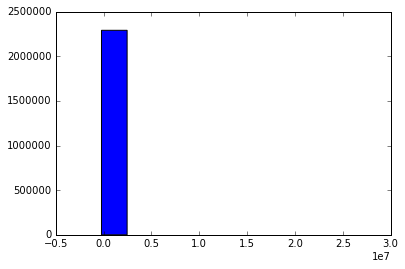

In [38]:
hist(donations['TRANSACTION_AMT'])

So we likely aren't going to see good distribution until we remove outliers. As we can see from the histogram the *vast* majority of donations are in a small section, but the outliers (both negative and positive) are making our histogram unreadable.

Since we might just want to look at one or two candidates and see the distribution there, let's first combine our dataframes and then look for outliers. This helps us tell more of the story as well, if we find that an overwhelming number of outliers for one candidate exist.

First, let's see how many of our candidates have a major political committee listed. We can use [shape](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) to take a look at how many rows we have in the resulting DataFrame.

In [39]:
candidates[candidates['CAND_PCC'].notnull()].shape

(5241, 15)

Not too bad! So let's now merge that in with the individual dataframe, and see what results we get when using a few different joins.

In [40]:
donations.set_index('CMTE_ID').join(candidates.set_index('CAND_PCC'))

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00000059,N,YE,P,201601269004607741,15,IND,"HALL, DONALD J. MR.",MISSION HILLS,KS,662081145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M2,P,201602229009616657,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M2,P,201602229009616657,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M3,P,201603189009789336,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M3,P,201603189009789336,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M4,P,201604199012594549,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M4,P,201604199012594550,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M5,P,201605209015570704,15,IND,"HALL, DAVID EARL MR.",MISSION HILLS,KS,662081146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M5,P,201605209015570705,15,IND,"HALL, DONALD JOYCE MR. JR.",MISSION HILLS,KS,662081211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000422,N,M2,P,15970260203,15,IND,"HOLLEY, GLEN EDWARD MD",DALLAS,TX,752404908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, not a great sign. It looks like our committee IDs don't properly match. Let's try joining on the candidates table.

In [41]:
donations.set_index('CMTE_ID').join(candidates.set_index('CAND_PCC'), how='right')

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00002592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,WA,H,5.0,C,P,W 726 6TH AVENUE #301,NaN,SPOKANE,WA,99204.0
C00002600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MI,H,12.0,C,P,"700 13TH STREET, N.W.",SUITE 600,WASHINGTON,DC,20005.0
C00005041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,OH,H,16.0,C,P,8787 ERIE AVENUE SW,NaN,NAVARRE,OH,44662.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"TRICHE, CLARENCE",CUT OFF,LA,70345,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"WHITE, III, ROGER",HOUMA,LA,70360,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"ZANE, CURTIS",MC LEAN,VA,2.21012e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"ALCALDE, RICHARD",WASHINGTON,DC,2.00032e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BERTOSON, TODD",WASHINGTON,DC,2.00025e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BORDELON, BENJAMIN",RACELAND,LA,70394,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BROWN, ANN",FAIRBANKS,AK,99709,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0


This is better, but now maybe I'm just curious about the candidates with donations, not the other ones without. We can use an inner join to do so.

In [42]:
donations.set_index('CMTE_ID').join(candidates.set_index('CAND_PCC'), how='inner')

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00012229,N,Q1,P,15951120698,15,IND,"TRICHE, CLARENCE",CUT OFF,LA,70345,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120698,15,IND,"WHITE, III, ROGER",HOUMA,LA,70360,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120698,15,IND,"ZANE, CURTIS",MC LEAN,VA,2.21012e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"ALCALDE, RICHARD",WASHINGTON,DC,2.00032e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"BERTOSON, TODD",WASHINGTON,DC,2.00025e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"BORDELON, BENJAMIN",RACELAND,LA,70394,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BROWN, ANN",FAIRBANKS,AK,99709,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BURNETT, WALLACE",WASHINGTON,DC,20001,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BUSSELL, CHARLES",ANCHORAGE,AK,9.95091e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120687,15,IND,"CHAPMAN, COLIN",ARDMORE,OK,73401,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0


This is looking better, let's save the output to a new combined dataframe.

In [43]:
cand_donations = donations.set_index('CMTE_ID').join(candidates.set_index('CAND_PCC'), how='inner')

In [44]:
cand_donations.describe()

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
count,1.315443e+06,1.315433e+06,1.315443e+06,1.315443e+06,1.315443e+06,1.315443e+06,1.315030e+06,1.300684e+06
mean,1.940324e+17,5.549509e+06,7.054304e+02,1.053504e+06,3.702885e+18,2.015988e+03,2.477191e+00,5.597785e+07
std,3.827538e+16,3.114766e+06,2.362516e+04,1.028528e+05,8.382934e+17,6.719768e-01,6.677650e+00,1.557520e+08
min,1.402120e+10,4.103100e+04,-1.080000e+04,-9.418228e+06,1.010520e+18,2.002000e+03,0.000000e+00,6.030000e+02
25%,2.015122e+17,NaN,5.000000e+01,1.036338e+06,4.030420e+18,2.016000e+03,NaN,NaN
50%,2.016041e+17,NaN,2.500000e+02,1.061693e+06,4.051120e+18,2.016000e+03,NaN,NaN
75%,2.016052e+17,NaN,1.000000e+03,1.073715e+06,4.060220e+18,2.016000e+03,NaN,NaN
max,2.016060e+17,1.231202e+07,2.656953e+07,1.075942e+06,4.122920e+18,2.020000e+03,5.300000e+01,9.894498e+08


(array([  1.31544200e+06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -1.08000000e+04,   2.64723300e+06,   5.30526600e+06,
          7.96329900e+06,   1.06213320e+07,   1.32793650e+07,
          1.59373980e+07,   1.85954310e+07,   2.12534640e+07,
          2.39114970e+07,   2.65695300e+07]),
 <a list of 10 Patch objects>)

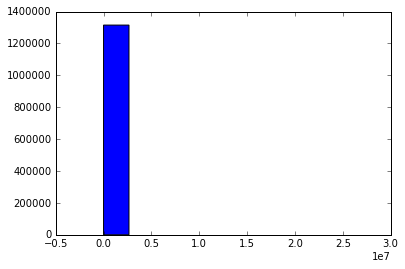

In [45]:
hist(cand_donations['TRANSACTION_AMT'])

In [46]:
cand_donations['TRANSACTION_AMT'].max()

26569530

Wow! Let's just check candidates with donations over a million USD.

We can utilize [value_counts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to give us a nice stacked chart.

In [47]:
cand_donations[cand_donations['TRANSACTION_AMT'] > 1000000]

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00577130,N,M3,P,201603209011925992,15E,ORG,UNITEMIZED TOTAL,NaN,DC,00000,...,US,P,0.0,O,C,221 VAN PATTEN PKWY,NaN,BURLINGTON,VT,5408.0
C00592659,N,Q1,P,201604159012560980,15C,CAN,"GONZALEZ, VICENTE",MCALLEN,TX,785040603,...,TX,H,15.0,O,C,P.O. BOX 720603,NaN,MCALLEN,TX,785040603.0
C00607952,N,12P,P,201604149012422390,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422391,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422392,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422390,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0


In [48]:
cand_donations[cand_donations['TRANSACTION_AMT'] > 1000000]['CAND_NAME'].value_counts()

TRONE, DAVID             4
SANDERS, BERNARD         1
GONZALEZ, VICENTE MR.    1
Name: CAND_NAME, dtype: int64

And what about smaller donations?

In [49]:
cand_donations[cand_donations['TRANSACTION_AMT'] < 200]['CAND_NAME'].value_counts()

SANDERS, BERNARD                 373739
CRUZ, RAFAEL EDWARD "TED"          5563
RUBIO, MARCO                       5044
CLINTON, HILLARY RODHAM            4766
CARSON, BENJAMIN S SR MD           1311
BROWNLEY, JULIA                    1132
YOUNG, TODD CHRISTOPHER             986
JOHNSON, RONALD HAROLD              976
BLUNT, ROY                          786
PETERS, SCOTT                       779
BUSH, JEB                           773
AGUILAR, PETE                       688
PELOSI, NANCY                       658
RUIZ, RAUL DR.                      572
MCCAIN, JOHN S                      488
FEINGOLD, RUSSELL DANA              484
DESANTIS, RONALD D                  440
BERA, AMERISH                       431
BENNET, MICHAEL F                   415
WALKER, SCOTT                       397
HECK, JOE                           353
GRAHAM, LINDSEY O                   321
FLORES, LUCY                        319
LEE, MIKE                           248
CONNOLLY, GERALD EDWARD             239


Since we have quite a lot of candidate data in here, I want to whittle it down to this year's election, maybe to those who have a significant amount of donors. Let's first just get it down to this year. I can't remember the column name of the year, but I can check with the columns attribute, which will return the Column index.

In [50]:
cand_donations.columns

Index(['AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP',
       'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE', 'EMPLOYER',
       'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT', 'OTHER_ID',
       'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID', 'CAND_ID',
       'CAND_NAME', 'CAND_PTY_AFFILIATION', 'CAND_ELECTION_YR',
       'CAND_OFFICE_ST', 'CAND_OFFICE', 'CAND_OFFICE_DISTRICT', 'CAND_ICI',
       'CAND_STATUS', 'CAND_ST1', 'CAND_ST2', 'CAND_CITY', 'CAND_ST',
       'CAND_ZIP'],
      dtype='object')

In [51]:
cand_donations = cand_donations[cand_donations['CAND_ELECTION_YR'] == 2016]

Next, we can start grouping by candidate.

A Pandas [groupby object](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) operates differently than DataFrames. You can easily run aggregate groupings on them, of varying complexity. The results are a dataframe with the grouping as the index.

In [52]:
grouped = cand_donations.groupby('CAND_NAME')

In [53]:
grouped.sum()

,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CAND_NAME,,,,,,,,
"ABRAHAM, RALPH LEE DR. JR.",1.854615e+19,3.290655e+08,95500.0,9.707604e+07,3.725910e+20,185472.0,460.0,6.552058e+10
"ACHADJIAN, KHATCHIK",1.713561e+20,5.207203e+09,666509.0,9.020319e+08,3.442164e+21,1713600.0,20400.0,7.940700e+07
"ADAMS, ALMA SHEALEY",6.188432e+19,1.643391e+09,163919.0,3.301151e+08,1.271502e+21,631008.0,3756.0,8.827226e+06
"ADAMS, DESMUND DOUGLAS",1.652911e+19,4.616053e+08,53871.0,8.639716e+07,3.332253e+20,165312.0,246.0,4.124928e+06
"ADAMS, SANDY",1.491436e+19,6.431691e+08,53450.0,7.642506e+07,3.006129e+20,149184.0,444.0,2.380580e+06
"ADERHOLT, ROBERT BROWN",7.115947e+19,1.937483e+09,375857.0,3.754434e+08,1.450254e+21,723744.0,1436.0,1.276784e+07
"AGUILAR, PETE",2.874720e+20,8.423725e+09,736635.0,1.661670e+09,6.372989e+21,3175200.0,48825.0,1.455662e+08
"ALARCON, RICHARD ANTHONY MR.",1.391074e+19,2.937691e+08,44240.0,7.394546e+07,2.794298e+20,139104.0,2001.0,6.302805e+06
"ALBARRAN, CHARLENE MCARTHUR",8.668966e+18,1.400667e+08,224607.0,4.550525e+07,1.736893e+20,86688.0,86.0,3.614924e+06


In [56]:
grouped.agg({'TRANSACTION_AMT': [np.sum, np.mean], 'NAME': lambda x: len(set(x))})

TRANSACTION_AMT                   NAME
                                          sum          mean <lambda>
CAND_NAME                                                           
ABRAHAM, RALPH LEE DR. JR.              95500   1038.043478       86
ACHADJIAN, KHATCHIK                    666509    784.128235      697
ADAMS, ALMA SHEALEY                    163919    523.702875      224
ADAMS, DESMUND DOUGLAS                  53871    656.963415       70
ADAMS, SANDY                            53450    722.297297       67
ADERHOLT, ROBERT BROWN                 375857   1046.955432      291
AGUILAR, PETE                          736635    467.704762      783
ALARCON, RICHARD ANTHONY MR.            44240    641.159420       51
ALBARRAN, CHARLENE MCARTHUR            224607   5223.418605       40
ALBERTSON, STEWART                      32450   1158.928571       21
ALLAN, SETH                             18136    755.666667       19
ALLEN, JASON EDWARD                    155608   1030.516556      142
ALLEN, RICHARD W                       419225    836.776447      442
ALLEN-REESE, POGO MOCHELLO              13533   1127.750000        2
ALLIEGRO, MARK C                        50915    547.473118       78
ALLVORD, TERRY                           2861    286.100000        9
AMADOR, ANTONIO C                       16340   1021.250000       15
AMASH, JUSTIN                          451725   1398.529412      233
AMATA, AUMUA                            23575   1473.437500       15
AMODEI, MARK EUGENE                    290014    730.513854      242
ANDERS, SAMUEL                            811     81.100000        2
ANDERSON, DAVID M                       89256    776.139130       55
ANGELLE, SCOTT MR.                     349272   1919.076923      156
ANGLE, SHARRON E                        37188   4132.000000        8
ANSEL, JEFFREY                           4567   1522.333333        3
ANTHONY, MALCOLM                        17863    525.382353       25
APPLEGATE, DOUGLAS LOREN                43530   1116.153846       34
ARMSTRONG-STONER, DEREK JAMES            3365    420.625000        3
ARNESS, MARK KENNETH                    12566   1047.166667        4
ARRINGTON, JODEY COOK                  727494    899.250927      624
...                                       ...           ...      ...
WINFREY, JANICE MARIE                   46065   1096.785714       38
WINGE, KEVIN BIRDEEN                    10150    507.500000       20
WINSTON, SIMON WOOD                     30300   1165.384615       26
WINTEREGG, J D                          51240    711.666667       53
WITTMAN, ROBERT J MR.                  270080    831.015385      246
WOFFORD, ROSEANN                          250    250.000000        1
WOLF, AUGUST L                         842531   1452.639655      274
WOMACK, STEVE                          180150    896.268657      163
WOODALL, ROB REP.                      146500    957.516340      132
WRIGHT, DOUGLAS A.                      33625   1159.482759       18
WRIGHT, KEITH L T                      479795   1070.970982      382
WRIGHT, KENNETH W DR.                   29800    745.000000       36
WYDEN, RONALD L                       4775888   1567.921208     2301
WYMAN, PHILLIP D                         5950    991.666667        6
YANDIK, WILL                           211900    837.549407      222
YARMUTH, JOHN A MR                     109898   1263.195402       75
YODER, KEVIN                           775912   1640.405920      360
YODER, SHELLI                          214699    608.212465      277
YOHO, THEODORE SCOTT                   406977   1035.564885      335
YOUNG JR, LARRY DEAN                    16200   1350.000000       12
YOUNG, DAVID                           348502    797.487414      343
YOUNG, DONALD E                        322123    920.351429      246
YOUNG, MICHELE LORI                     67921  33960.500000        2
YOUNG, TODD CHRISTOPHER               7832010   1304.465356     1480
YU, EUGENE MR.              

You can also use [transform](http://pandas.pydata.org/pandas-docs/stable/groupby.html#transformation) to modify a dataframe based on a groupby (you can even do this in place!)

In [57]:
cand_donations['unique_donors'] = cand_donations.groupby('CAND_NAME')['NAME'].transform(lambda x: 
                                                                                        len(set(x)))

In [58]:
cand_donations['unique_donors'].mean()

68558.420643642254

In [59]:
cand_donations['unique_donors'].median()

23986.0

In [60]:
sign_cand_donations = cand_donations[cand_donations['unique_donors'] > cand_donations['unique_donors'].mean()]

In [61]:
sign_cand_donations.shape

(567787, 35)

In [62]:
sign_cand_donations.groupby('CAND_NAME').sum()

,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CAND_NAME,,,,,,,,
"CLINTON, HILLARY RODHAM",2.412947e+22,6.695439e+11,132751051.0,1.260053e+11,4.862908e+23,241327296.0,0.0,1.219269e+13
"SANDERS, BERNARD",9.033451e+22,1.915676e+12,69458204.0,4.799108e+11,1.818576e+24,903331296.0,0.0,2.423222e+09


Wait! What happened to Trump? Does this mean Trump has less than the mean value for candidates just in terms of numbers of donors? Let's see how he compares. 

In [63]:
cand_donations[cand_donations['CAND_NAME'].str.contains('TRUMP')]['unique_donors']

C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
             ... 
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100 

In [64]:
cand_donations[cand_donations['CAND_NAME'].str.contains('TRUMP')].describe()

,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
count,5.706000e+03,5.706000e+03,5706.000000,5.706000e+03,5.706000e+03,5706.0,5706.0,5706.0
mean,2.015761e+17,5.807555e+06,595.157028,1.052756e+06,4.060373e+18,2016.0,0.0,10022.0
std,4.182682e+13,3.430582e+06,1860.180713,1.413946e+04,4.029590e+16,0.0,0.0,0.0
min,2.015072e+17,1.012016e+06,-2700.000000,1.015464e+06,4.020220e+18,2016.0,0.0,10022.0
25%,2.015122e+17,3.052016e+06,250.000000,1.036338e+06,4.032220e+18,2016.0,0.0,10022.0
50%,2.016022e+17,4.252016e+06,250.000000,1.051572e+06,4.042220e+18,2016.0,0.0,10022.0
75%,2.016042e+17,8.232015e+06,500.000000,1.066437e+06,4.121820e+18,2016.0,0.0,10022.0
max,2.016052e+17,1.231202e+07,86936.000000,1.074038e+06,4.121820e+18,2016.0,0.0,10022.0


Let's add him back in here, since we likely want to compare the main contenders.

In [65]:
sign_cand_donations = sign_cand_donations.append(cand_donations[cand_donations['CAND_NAME'].str.contains('TRUMP')])

In [66]:
sign_cand_donations.groupby('CAND_NAME').sum()['TRANSACTION_AMT']

CAND_NAME
CLINTON, HILLARY RODHAM    132751051.0
SANDERS, BERNARD            69458204.0
TRUMP, DONALD J.             3395966.0
Name: TRANSACTION_AMT, dtype: float64

In [67]:
sign_cand_donations.groupby('CAND_NAME').min()['unique_donors'].sort_values()

CAND_NAME
TRUMP, DONALD J.             4633
CLINTON, HILLARY RODHAM     85089
SANDERS, BERNARD           159977
Name: unique_donors, dtype: int64

So we can already see some trends emerging. Bernie Sanders has the most donations, Hillary Clinton has the most money from individual donors and Donald Trump is significantly lacking in both in comparison. In fact, if you use [candidate committe details](http://www.fec.gov/fecviewer/CandidateCommitteeDetail.do) you can see he has loaned himself more than $43M to run his campaign so far.

## Now it's your turn!


Possible Next Tasks:
----------------------

- Make a histogram of each candidates donations, do you see any trends?
- Use [standard deviations](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) to remove or focus on outliers from the dataset.
- Which states have the most donors?
- Which occupations or employers are most represented by which campaigns?
- Use below committee data to find other committees for the main candidates (i.e. what other committees support Bernie, Trump and Clinton)? or even, how many people donated to which committees this year? (like the NRA or Exxon or AT&T?)

Bonus: Import the committee data and see if you can join with our original donations file, can you find what other commmittees have large and small donation groupings? Here's the import to get started.

In [ ]:
comm_header = [r for r in reader(open('data/cm_header_file.csv', 'r'))]

In [ ]:
committees = pd.read_csv('data/cm.txt', names=comm_header[0], sep='|')

In [ ]:
committees.head()